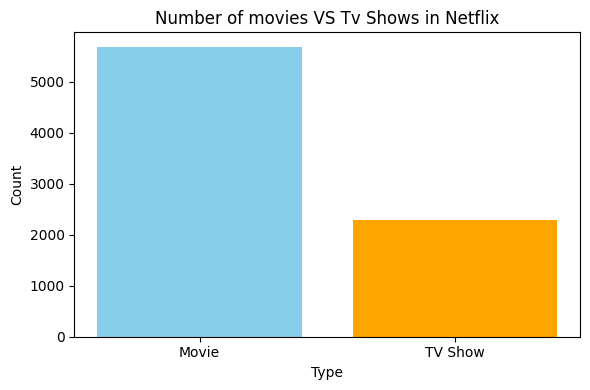

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('netflix_titles.csv')

#cleaning data
df = df.dropna(subset=['type','release_year','rating','country','duration'])

type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values, color=['skyblue','orange'])
plt.title('Number of movies VS Tv Shows in Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

RATING

In [ ]:
# print(df['type'].unique())
type_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(type_counts,labels=type_counts.index,autopct='%1.1f%%',startangle=90,
        # colors=['gold','skyblue','lightgreen','coral']
        )
plt.title('Percentage of content rating')
plt.tight_layout()
plt.show()

In [ ]:
movies_df = df[df['type']=='Movie'].copy()
# movies_df['duration'] = gets movies['duration]
# replace(' min',''):replaces ' min' with ''
# converts '120' to 120
movies_df['duration_int'] = movies_df['duration'].str.replace(' min','').astype(int)
plt.figure(figsize=(8,6))
plt.hist(movies_df['duration_int'],bins=30,color='purple',edgecolor = 'black')
plt.xlabel('Number of movies')
plt.ylabel('Duration minutes')
plt.title('Distribution of movie duration')
plt.tight_layout()
plt.show()

In [ ]:
release_count = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_count.index,release_count.values, color='red')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.title('Release Year Vs Number of Shows')
plt.tight_layout()
plt.show()

In [ ]:
country_counts = df['country'].value_counts().head(10)
plt.barh(country_counts.index,country_counts.values,color = 'teal')
# plt.bar(product,sales,color = 'orange',label='Sales 2025')
plt.xlabel('Number of shows')
plt.ylabel('Country')
plt.title('Top 10 countries by number of shows')
plt.tight_layout()
plt.show()


In [ ]:
content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
fig ,ax = plt.subplots(1,2,figsize=(12,5))
#first subplot: movies
ax[0].plot(content_by_year.index,content_by_year['Movie'],color = 'blue')
ax[0].set_title('Movies released by year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')
#second subplot:TV Shows
ax[1].plot(content_by_year.index,content_by_year['TV Show'],color = 'green')
ax[1].set_title('TV shows released by year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Movies')
fig.suptitle('Comparison of Movies and Tv shows released over years')
plt.tight_layout()
plt.show()